In [71]:
#installing kaggle 
! pip install kaggle

!pip install ptflops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ptflops: filename=ptflops-0.6.9-py3-none-any.whl size=11712 sha256=c8b16ec614e1d0af30f308eec9b260676018c0e894202ae255f2fca7fdaeebc2
  Stored in directory: /root/.cache/pip/wheels/c8/71/2f/92426c1ef33fb2e275b533878d8378f91c7f26846d9669019c
Successfully built ptflops


In [ ]:
#mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#making a directory
!mkdir ~/.kaggle

In [ ]:
# COPY CONTENT BELOW IN A JSON AND NAME IT kaggle.json
# {"username":"varshapwalia","key":"f740f4ae05dd367aa8698235a1e924da"}

In [ ]:
# UPLOAD THE kaggle.json in files and run the below cmds

In [ ]:
! cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
 #downloading Dataset1
! kaggle datasets download grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:05<00:00, 225MB/s]
100% 1.03G/1.03G [00:05<00:00, 215MB/s]


In [ ]:
#Unzipping the dataset 1
! unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
#Downloading Dataset 2
# ! kaggle datasets download ayuraj/american-sign-language-dataset

In [ ]:
#uniziping Dataset 2
# ! unzip american-sign-language-dataset.zip

In [ ]:
#Downloading Dataset 3
# ! kaggle datasets download ayuraj/asl-dataset

In [ ]:
# Unziping dataset 3
# ! unzip asl-dataset.zip

In [ ]:
import os

In [ ]:
folder_array = os.listdir('/content/asl_alphabet_train/asl_alphabet_train')
print(folder_array, type(folder_array))

['X', 'J', 'B', 'O', 'K', 'Y', 'U', 'T', 'P', 'S', 'F', 'C', 'E', 'D', 'del', 'Z', 'R', 'nothing', 'V', 'Q', 'space', 'H', 'L', 'W', 'M', 'A', 'G', 'N', 'I'] <class 'list'>


In [ ]:
# Reduce Folder images size
from random import sample

for i in folder_array:
  # making folder path
  class_folder_path='/content/asl_alphabet_train/asl_alphabet_train/'+str(i)

  files = os.listdir(class_folder_path)
  for temp_file in sample(files, 2150):
    # print(temp_file)
    os.remove(class_folder_path+'/'+temp_file)

In [ ]:
from random import sample

for i in folder_array:
  # making folder path
  class_folder_path='/content/asl_alphabet_train/asl_alphabet_train/'+str(i)
  
  # folder 
  print(class_folder_path)
  
  # counter per folder
  _, _, files = next(os.walk(class_folder_path))
  file_count = len(files)
  print(file_count)

/content/asl_alphabet_train/asl_alphabet_train/X
100
/content/asl_alphabet_train/asl_alphabet_train/J
100
/content/asl_alphabet_train/asl_alphabet_train/B
100
/content/asl_alphabet_train/asl_alphabet_train/O
100
/content/asl_alphabet_train/asl_alphabet_train/K
100
/content/asl_alphabet_train/asl_alphabet_train/Y
100
/content/asl_alphabet_train/asl_alphabet_train/U
100
/content/asl_alphabet_train/asl_alphabet_train/T
100
/content/asl_alphabet_train/asl_alphabet_train/P
100
/content/asl_alphabet_train/asl_alphabet_train/S
100
/content/asl_alphabet_train/asl_alphabet_train/F
100
/content/asl_alphabet_train/asl_alphabet_train/C
100
/content/asl_alphabet_train/asl_alphabet_train/E
100
/content/asl_alphabet_train/asl_alphabet_train/D
100
/content/asl_alphabet_train/asl_alphabet_train/del
100
/content/asl_alphabet_train/asl_alphabet_train/Z
100
/content/asl_alphabet_train/asl_alphabet_train/R
100
/content/asl_alphabet_train/asl_alphabet_train/nothing
100
/content/asl_alphabet_train/asl_alphab

In [ ]:
# os.listdir('/content/asl_dataset/asl_dataset')

In [ ]:
# os.listdir('/content/asl/asl')

In [ ]:
from torch.utils.data import dataloader
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets

dataset_1_path = '/content/asl_alphabet_train/asl_alphabet_train'
# dataset_2_path = '/content/asl_dataset/asl_dataset'
# dataset_3_path = '/content/asl/asl'

def get_dataset_for_normalization_values(data_path):
  dataset_training_transforms = transforms.Compose([
      transforms.Resize((224,224)),
      transforms.ToTensor()
  ])
  train_dataset = torchvision.datasets.ImageFolder(root=data_path, transform= dataset_training_transforms)
  dataset = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle = False)
  return dataset

dataset_1 = get_dataset_for_normalization_values(dataset_1_path)
# dataset_2 = get_dataset_for_normalization_values(dataset_2_path)
# dataset_3 = get_dataset_for_normalization_values(dataset_3_path)


In [ ]:
def get_mean_and_std(loader):
  mean = 0
  std = 0
  total_image_count = 0
  for images, _ in loader:
    image_count_in_a_batch = images.size(0)
    images = images.view(image_count_in_a_batch,images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_image_count += image_count_in_a_batch
    
  mean /= total_image_count
  std /= total_image_count

  return mean,std

In [ ]:
mean_1, std_1 = get_mean_and_std(dataset_1)

In [ ]:
# mean_2, std_2 = get_mean_and_std(dataset_2)

In [ ]:
# mean_3, std_3 = get_mean_and_std(dataset_3)

In [ ]:

def load_dataset(path, test_split, val_split, batch_size, input_size, mean_val, std_dev, len_size_flag):

    transform_dict = {'src' : transforms.Compose(
        [transforms.Resize(input_size),
         transforms.RandomHorizontalFlip(p=.25),
         transforms.RandomRotation(degrees=15),
        #  transforms.RandomVerticalFlip(p=.25),
         transforms.ToTensor(),
         transforms.Normalize(mean = mean_val, std = std_dev)])}
    
    data = datasets.ImageFolder(root = path, transform= transform_dict['src'])
    train_size = int(len(data)*(1-(test_split + val_split)))
    test_size = int(len(data)*test_split) 
    val_size = int(len(data)*val_split)

    print(data)
    print("SPLIT COUNTS", train_size,test_size,val_size)
    # logically the data was not fitting into the total logic of split so had to make the change, becuase of even and odd number of files.
    if len_size_flag:
      val_size=val_size+1
  
    
    train, test, val = torch.utils.data.random_split(data,[train_size, test_size, val_size])
    data_loader_train = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=False, num_workers = 0)
    data_loader_test = torch.utils.data.DataLoader(test, batch_size= batch_size, shuffle=True, drop_last=False, num_workers = 0)
    data_loader_val = torch.utils.data.DataLoader(val, batch_size= batch_size, shuffle=True, drop_last=False, num_workers = 0)
  
    return data_loader_train, data_loader_test, data_loader_val

In [ ]:
training_1, testing_1, validation_1 = load_dataset(path=dataset_1_path, test_split=0.3, val_split=0.1, batch_size=64, input_size=(224,224), mean_val=mean_1, std_dev=std_1, len_size_flag=False)

Dataset ImageFolder
    Number of datapoints: 2900
    Root location: /content/asl_alphabet_train/asl_alphabet_train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.25)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=tensor([0.5172, 0.4975, 0.5128]), std=tensor([0.2022, 0.2311, 0.2402]))
           )
SPLIT COUNTS 1740 870 290


In [ ]:
# training_2, testing_2, validation_2 = load_dataset(path=dataset_2_path, test_split=0.3, val_split=0.1, batch_size=32, input_size=(224,224), mean_val=mean_2, std_dev=std_2, len_size_flag=True)

In [ ]:
# training_3, testing_3, validation_3 = load_dataset(path=dataset_3_path, test_split=0.3, val_split=0.1, batch_size=64, input_size=(224,224), mean_val=mean_3, std_dev=std_3, len_size_flag=True)

In [ ]:
def plot_data_loader(data_loader, gridDims):
    
    fig, axes = plt.subplots(nrows=gridDims[0], ncols=gridDims[1], figsize=(5,5))
    dataiter = iter(data_loader)
    for i in range(gridDims[0]):
        for j in range(gridDims[1]):
            images, _ = dataiter.next()
            axes[i, j].imshow(np.transpose(images[0].numpy(), (1, 2, 0)))

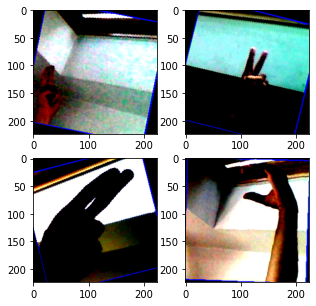

In [ ]:
plot_data_loader(training_1, (2,2))

In [ ]:
# plot_data_loader(training_2, (2,2))

In [ ]:
# plot_data_loader(training_3, (2,2))

In [87]:
# VAIBHAV's CODE START FROM HERE
import torchvision.models as models
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.models as models 
import statistics
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# **RESNET18**

In [ ]:
resnet_model = models.resnet18(pretrained=False)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
optimizer = torch.optim.Adam(resnet_model.parameters(), lr = 0.001)
criterion = torch.nn.CrossEntropyLoss()
num_epochs = 50

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
resnet_model.to(device) 

Device: cuda:0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
resnet_training_loss = []
resnet_training_accuracies = []
resnet_val_loss = []
resnet_val_accuracies = []

In [ ]:
def train(num_epochs, model, device, train_loader, val_loader, criterion, optimizer, t_loss, t_acc, v_loss, v_acc):

    total_steps = len(train_loader)
    print('Training starts...........')
    for epoch in range(num_epochs):
        epo_loss = []
        epo_acc = []
        epo_val_loss = []
        epo_val_acc = []
        start_time = time.time()
        for i, data in enumerate(train_loader):
            model.train()
            images, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output,labels)
            loss.backward()
            optimizer.step()
            total = labels.size(0)
            _,predicted = torch.max(output.data, 1)
            correct = (predicted == labels).sum().item()
            accuracy = (correct/total)*100


            correct_val = 0
            total_val = 0
            for data in val_loader:
                model.eval()
                with torch.no_grad():
                  images_val, labels_val = data[0].to(device), data[1].to(device)
                  outputs_val = model(images_val)
                  val_loss = criterion(outputs_val, labels_val)
                  _,predicted_val = torch.max(outputs_val.data, 1)
                  total_val += labels_val.size(0)
                  correct_val += (predicted_val == labels_val).sum().item()
                  val_accuracy = (correct_val/total_val)*100

            if (i % total_steps) == total_steps - 1:
                print('Train Epoch: {}, Train Loss: {:.4f}, Accuracy: {:.2f}%, Validation_loss: {:.4f}, Validation Accuracy: {:.2f}%'
                .format(epoch+1, loss.item(), accuracy, val_loss.item(), val_accuracy))
                epo_loss.append(loss.item())
                epo_acc.append(accuracy)
                epo_val_loss.append(val_loss.item())
                epo_val_acc.append(val_accuracy)

        t_loss.append(statistics.mean(epo_loss))
        t_acc.append(statistics.mean(epo_acc))
        v_loss.append(statistics.mean(epo_val_loss))
        v_acc.append(statistics.mean(epo_val_acc))
        print("--- %s seconds ---" % (time.time() - start_time))

    return model

In [ ]:
resnet = train(num_epochs, resnet_model, device, training_1, validation_1, criterion, optimizer, resnet_training_loss,
               resnet_training_accuracies, resnet_val_loss, resnet_val_accuracies)

Training starts...........
Train Epoch: 1, Train Loss: 0.3574, Accuracy: 91.67%, Validation_loss: 0.6794, Validation Accuracy: 78.62%
--- 42.222517013549805 seconds ---
Train Epoch: 2, Train Loss: 0.3430, Accuracy: 91.67%, Validation_loss: 0.2307, Validation Accuracy: 86.55%
--- 41.923043966293335 seconds ---
Train Epoch: 3, Train Loss: 0.3327, Accuracy: 91.67%, Validation_loss: 0.3575, Validation Accuracy: 91.03%
--- 41.55814862251282 seconds ---
Train Epoch: 4, Train Loss: 0.1349, Accuracy: 100.00%, Validation_loss: 0.3218, Validation Accuracy: 89.66%
--- 45.55218458175659 seconds ---
Train Epoch: 5, Train Loss: 0.0589, Accuracy: 100.00%, Validation_loss: 0.1690, Validation Accuracy: 94.83%
--- 46.14861464500427 seconds ---
Train Epoch: 6, Train Loss: 0.1912, Accuracy: 91.67%, Validation_loss: 0.8768, Validation Accuracy: 76.21%
--- 41.947879791259766 seconds ---
Train Epoch: 7, Train Loss: 0.2775, Accuracy: 91.67%, Validation_loss: 0.9725, Validation Accuracy: 72.07%
--- 41.03355193

In [103]:
def test(model, device, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0 
        test_loss = 0
        resnet_y_pred = []
        resnet_y_true = [] 
        y_score = []
        for data in testing_1:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            test_loss += criterion(outputs, labels).item() 
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            conf, _ = torch.max(probabilities, 1)

            
            test_loss /= len(test_loader)
            resnet_y_pred.extend(predicted.data.cpu().numpy()) #Save Predictions
            resnet_y_true.extend(labels.data.cpu().numpy()) # Save Truth
            y_score.extend(conf.data.cpu().numpy())

        print('Test Accuracy of the model on the {} test images: {} having an average test loss: {:.4f}'
            .format(total, (correct / total) * 100, test_loss))
    
    return resnet_y_pred, resnet_y_true, y_score

In [105]:
resnet_y_pred , resnet_y_true, y_score = test(resnet, device, testing_1)

Test Accuracy of the model on the 870 test images: 91.14942528735632 having an average test loss: 0.0297


In [ ]:
def make_confusion_matrix(y_pred,y_true):
    classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']
    n_classes = len(classes)
    # Build confusion matrix
    cf_matrix = confusion_matrix(resnet_y_true, resnet_y_pred)
    df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) * n_classes, index = [i for i in classes],
                     columns = [i for i in classes])
    plt.figure(figsize = (30,15))
    sns.heatmap(df_cm, annot=True)

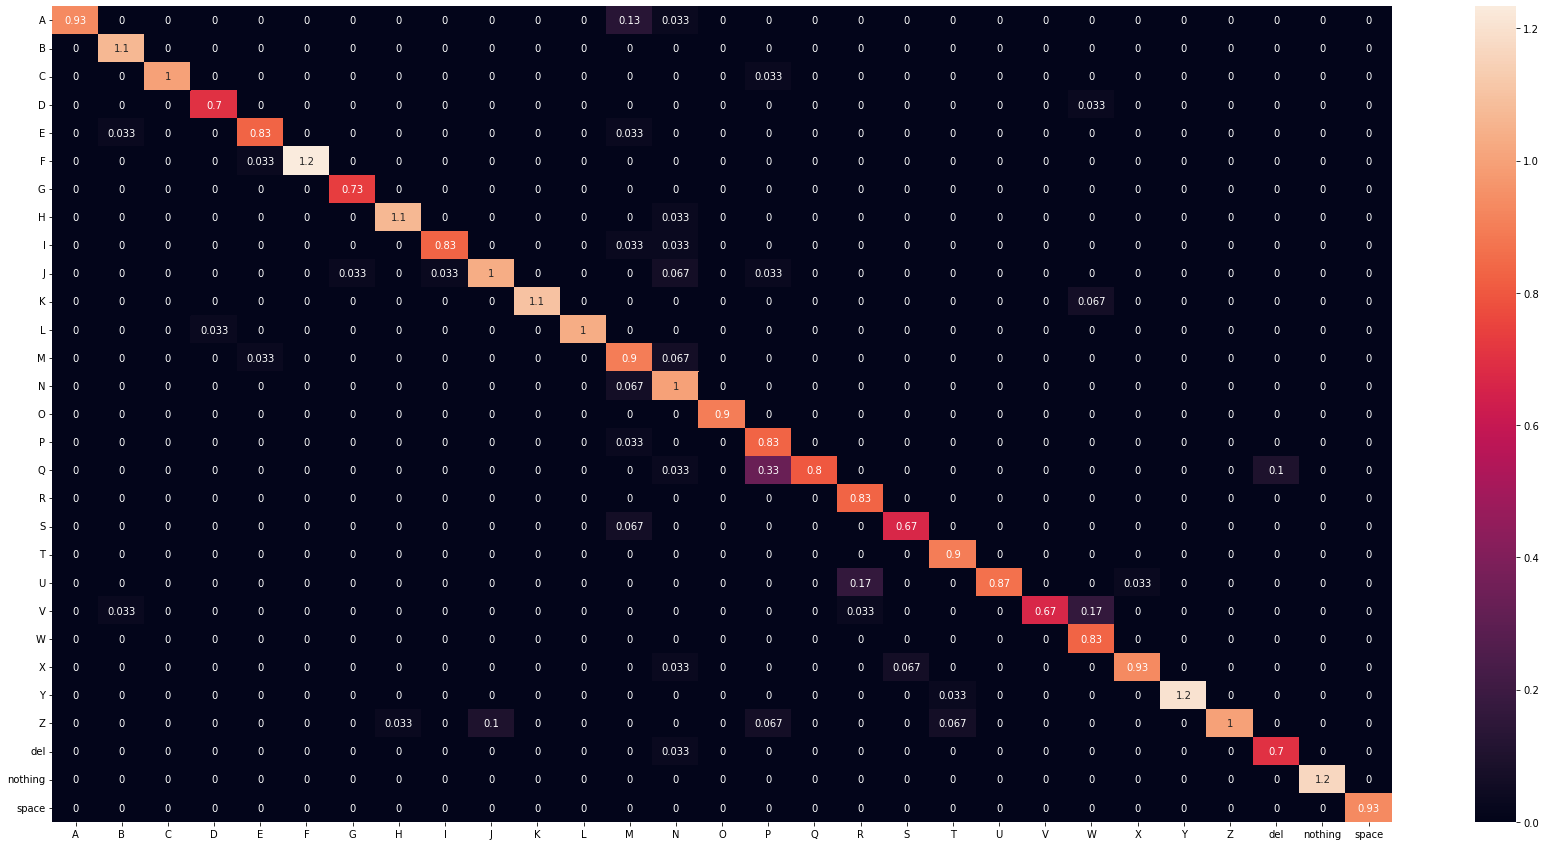

In [ ]:
make_confusion_matrix(resnet_y_pred, resnet_y_true)

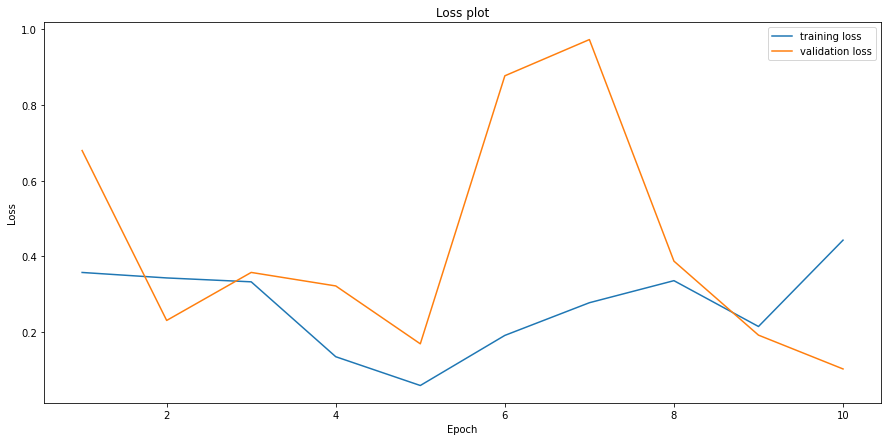

In [ ]:
epochs = [i+1 for i in range(num_epochs)]
plt.figure(figsize=(15,7))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

plt.plot(epochs, resnet_training_loss, label = 'training loss')
plt.plot(epochs,resnet_val_loss, label = 'validation loss')
plt.legend()

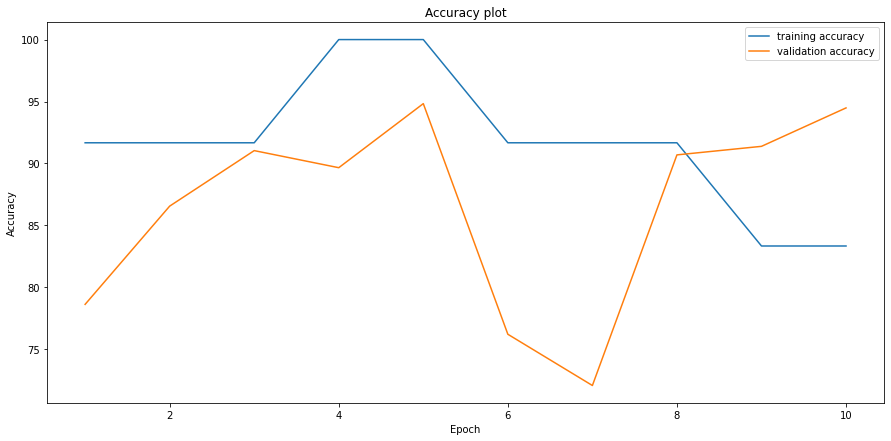

In [ ]:
epochs = [i+1 for i in range(num_epochs)]
plt.figure(figsize=(15,7))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

plt.plot(epochs, resnet_training_accuracies, label = 'training accuracy')
plt.plot(epochs,resnet_val_accuracies, label = 'validation accuracy')
plt.legend()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1_sco = f1_score(resnet_y_true, resnet_y_pred, average="macro")
print("F1_score is:", f1_sco)

precision_sco = precision_score(resnet_y_true, resnet_y_pred, average="macro")
print("precision_score is:", precision_sco)

recall_sco = recall_score(resnet_y_true, resnet_y_pred, average="macro")
print("recall_score is:", recall_sco)


F1_score is: 0.9211959397658395
precision_score is: 0.9288399036231778
recall_score is: 0.9259272586716091


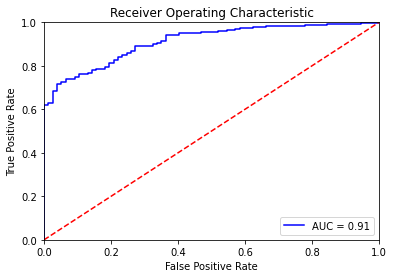

In [113]:
# ROC Score and curve

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import PrecisionRecallDisplay

binarize_true_results = []
for i in range(len(resnet_y_pred)):
  if resnet_y_pred[i]==resnet_y_true[i]:
    binarize_true_results.append(1)
  else:
    binarize_true_results.append(0)

fpr, tpr, threshold = roc_curve(binarize_true_results, y_score)
# print(fpr, tpr, threshold)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
# flop counts, number of parameters, Computational complexity (GMACs) where GFLOPs = 2 * GMACs

from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  net = resnet
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

ResNet(
  11.69 M, 100.000% Params, 1.82 GMac, 100.000% MACs, 
  (conv1): Conv2d(9.41 k, 0.080% Params, 118.01 MMac, 6.477% MACs, 3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(128, 0.001% Params, 1.61 MMac, 0.088% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(0, 0.000% Params, 802.82 KMac, 0.044% MACs, inplace=True)
  (maxpool): MaxPool2d(0, 0.000% Params, 802.82 KMac, 0.044% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    147.97 k, 1.266% Params, 464.83 MMac, 25.510% MACs, 
    (0): BasicBlock(
      73.98 k, 0.633% Params, 232.42 MMac, 12.755% MACs, 
      (conv1): Conv2d(36.86 k, 0.315% Params, 115.61 MMac, 6.344% MACs, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, 0.001% Params, 401.41 KMac, 0.022% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(0

In [ ]:
torch.save(resnet, 'resnet.pt')

In [ ]:
np.savez('resnet_training_loss.npz', resnet_training_loss)
np.savez('resnet_training_accuracies.npz', resnet_training_accuracies)
np.savez('resnet_val_loss.npz', resnet_val_loss)
np.savez('resnet_val_accuracies.npz', resnet_val_accuracies)

# **VGG**

In [75]:
vgg_model = models.vgg19(pretrained=False)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [146]:
optimizer = torch.optim.SGD(vgg_model.parameters(), lr = 0.001)
criterion = torch.nn.CrossEntropyLoss()
num_epochs = 50

In [147]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
vgg_model.to(device) 

Device: cuda:0


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [148]:
vgg_training_loss = []
vgg_training_accuracies = []
vgg_val_loss = []
vgg_val_accuracies = []

In [149]:
vggnet = train(num_epochs, vgg_model, device, training_1, validation_1, criterion, optimizer, vgg_training_loss, vgg_training_accuracies,
               vgg_val_loss, vgg_val_accuracies)

Training starts...........
Train Epoch: 1, Train Loss: 6.8841, Accuracy: 0.00%, Validation_loss: 6.8408, Validation Accuracy: 1.03%
--- 101.17308688163757 seconds ---
Train Epoch: 2, Train Loss: 6.8074, Accuracy: 0.00%, Validation_loss: 6.7260, Validation Accuracy: 2.76%
--- 101.10427141189575 seconds ---
Train Epoch: 3, Train Loss: 4.8961, Accuracy: 8.33%, Validation_loss: 4.4014, Validation Accuracy: 2.07%
--- 100.96052145957947 seconds ---
Train Epoch: 4, Train Loss: 3.9520, Accuracy: 0.00%, Validation_loss: 3.6074, Validation Accuracy: 3.45%
--- 102.18378019332886 seconds ---
Train Epoch: 5, Train Loss: 3.9487, Accuracy: 0.00%, Validation_loss: 3.4982, Validation Accuracy: 4.48%
--- 100.61758971214294 seconds ---


In [ ]:
y_pred, y_true, y_score = test(vgg_model, device, testing_1)

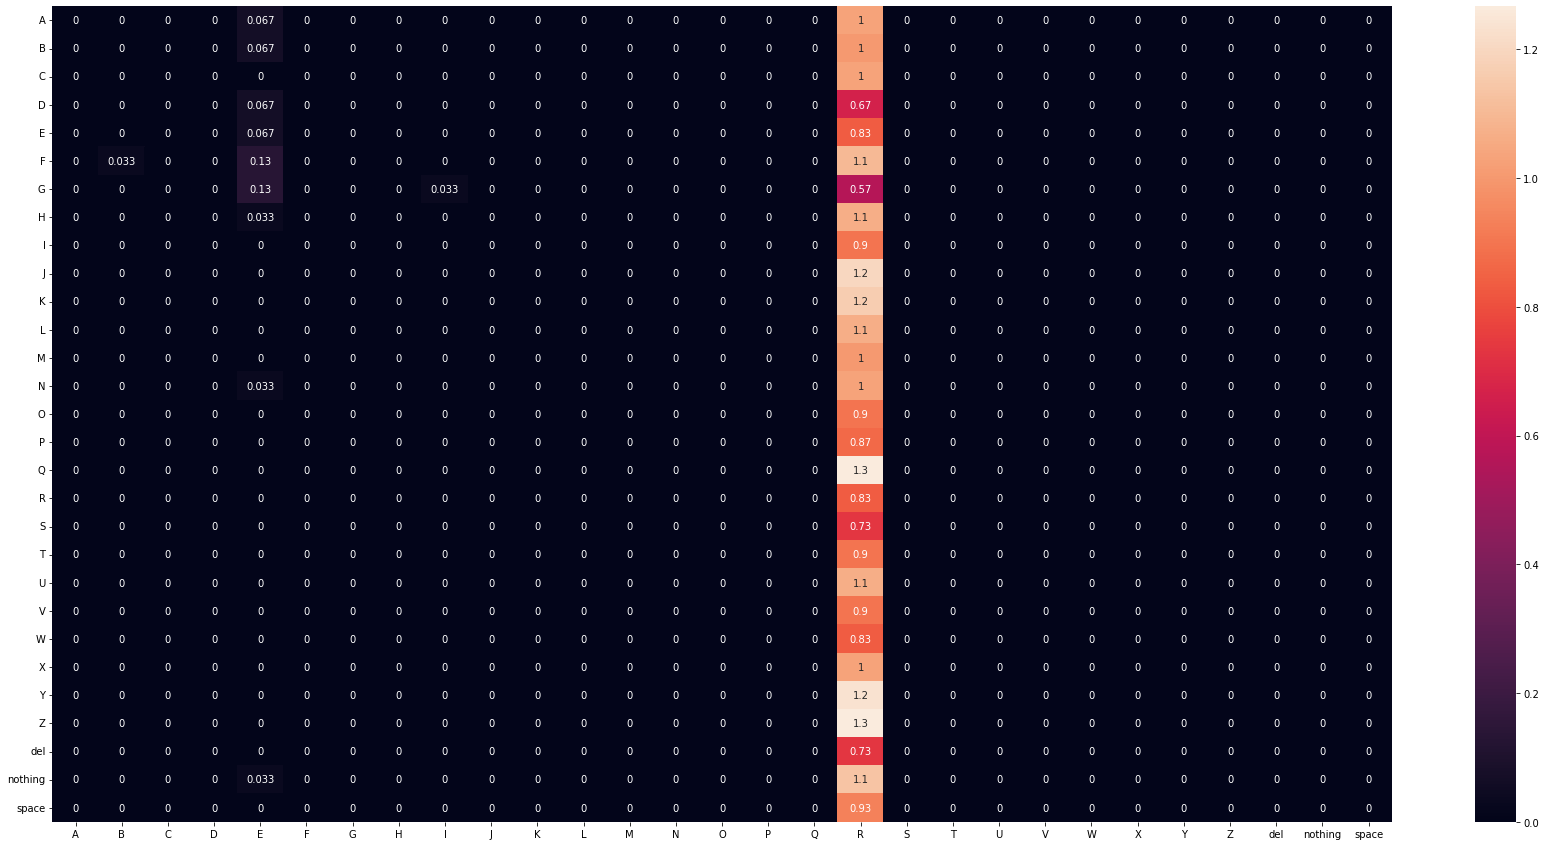

In [155]:
def make_confusion_matrix(y_pred,y_true):
    classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']
    n_classes = len(classes)
    # Build confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) * n_classes, index = [i for i in classes],
                     columns = [i for i in classes])
    plt.figure(figsize = (30,15))
    sns.heatmap(df_cm, annot=True)


make_confusion_matrix(y_pred, y_true)

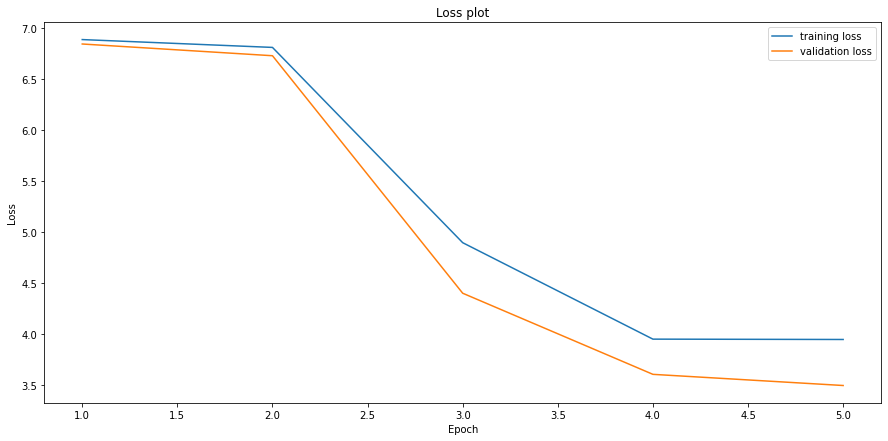

In [156]:
epochs = [i+1 for i in range(num_epochs)]
plt.figure(figsize=(15,7))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

plt.plot(epochs, vgg_training_loss, label = 'training loss')
plt.plot(epochs,vgg_val_loss, label = 'validation loss')
plt.legend()

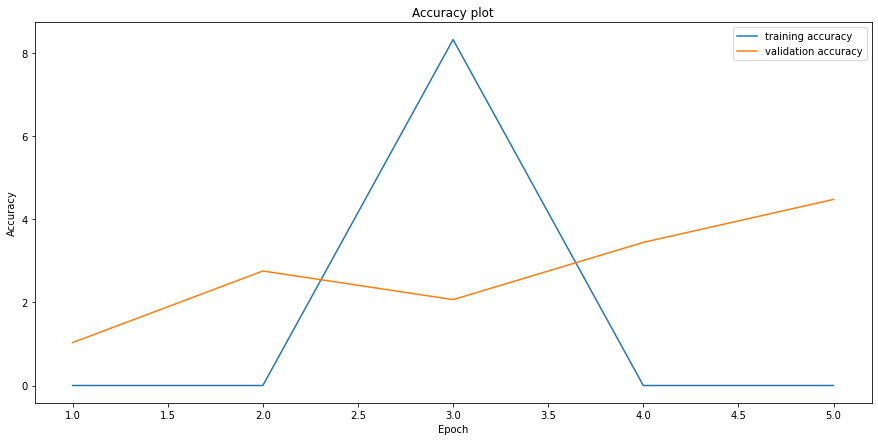

In [157]:
epochs = [i+1 for i in range(num_epochs)]
plt.figure(figsize=(15,7))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

plt.plot(epochs, vgg_training_accuracies, label = 'training accuracy')
plt.plot(epochs,vgg_val_accuracies, label = 'validation accuracy')
plt.legend()

In [158]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1_sco = f1_score(y_true, y_pred, average="macro")
print("F1_score is:", f1_sco)

precision_sco = precision_score(y_true, y_pred, average="macro")
print("precision_score is:", precision_sco)

recall_sco = recall_score(y_true, y_pred, average="macro")
print("recall_score is:", recall_sco)

F1_score is: 0.004971198611220706
precision_score is: 0.00464515742872473
recall_score is: 0.037037037037037035


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


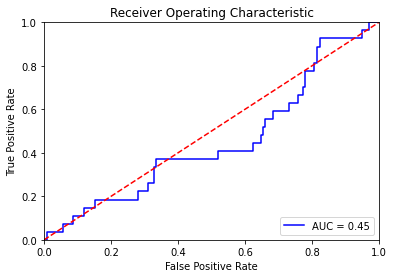

In [159]:
# ROC Score and curve

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import PrecisionRecallDisplay

binarize_true_results = []
for i in range(len(y_pred)):
  if y_pred[i]==y_true[i]:
    binarize_true_results.append(1)
  else:
    binarize_true_results.append(0)

fpr, tpr, threshold = roc_curve(binarize_true_results, y_score)
# print(fpr, tpr, threshold)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [160]:
# flop counts, number of parameters, Computational complexity (GMACs) where GFLOPs = 2 * GMACs

from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  net = vggnet
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

VGG(
  143.67 M, 100.000% Params, 19.67 GMac, 100.000% MACs, 
  (features): Sequential(
    20.02 M, 13.938% Params, 19.54 GMac, 99.371% MACs, 
    (0): Conv2d(1.79 k, 0.001% Params, 89.92 MMac, 0.457% MACs, 3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(0, 0.000% Params, 3.21 MMac, 0.016% MACs, inplace=True)
    (2): Conv2d(36.93 k, 0.026% Params, 1.85 GMac, 9.421% MACs, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(0, 0.000% Params, 3.21 MMac, 0.016% MACs, inplace=True)
    (4): MaxPool2d(0, 0.000% Params, 3.21 MMac, 0.016% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(73.86 k, 0.051% Params, 926.45 MMac, 4.710% MACs, 64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(0, 0.000% Params, 1.61 MMac, 0.008% MACs, inplace=True)
    (7): Conv2d(147.58 k, 0.103% Params, 1.85 GMac, 9.413% MACs, 128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(0, 0.000%

In [161]:
torch.save(vggnet, 'vggnet.pt')

np.savez('vggnet_training_loss.npz', vgg_training_loss)
np.savez('vggnet_training_accuracies.npz', vgg_training_accuracies)
np.savez('vggnet_val_loss.npz', vgg_val_loss)
np.savez('vggnet_val_accuracies.npz', vgg_val_accuracies)

# **Mobile Net**

In [173]:
mobilenet_model = models.mobilenet_v2(pretrained=False)

In [178]:
optimizer = torch.optim.Adam(mobilenet_model.parameters(), lr = 0.001)
criterion = torch.nn.CrossEntropyLoss()
num_epochs = 3

In [179]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
mobilenet_model.to(device) 

Device: cuda:0


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [180]:
mnet_training_loss = []
mnet_training_accuracies = []
mnet_val_loss = []
mnet_val_accuracies = []

In [181]:
mobilenet = train(num_epochs, mobilenet_model, device, training_1, validation_1, criterion, optimizer, mnet_training_loss,
                  mnet_training_accuracies,mnet_val_loss, mnet_val_accuracies)

Training starts...........
Train Epoch: 1, Train Loss: 2.1115, Accuracy: 41.67%, Validation_loss: 2.1984, Validation Accuracy: 35.52%
--- 42.477112770080566 seconds ---
Train Epoch: 2, Train Loss: 1.5658, Accuracy: 41.67%, Validation_loss: 3.0663, Validation Accuracy: 30.00%
--- 43.65872931480408 seconds ---
Train Epoch: 3, Train Loss: 1.9419, Accuracy: 58.33%, Validation_loss: 2.4117, Validation Accuracy: 30.34%
--- 42.38157844543457 seconds ---


In [182]:
y_pred, y_true, y_score = test(mobilenet, device, testing_1)

Test Accuracy of the model on the 870 test images: 34.48275862068966 having an average test loss: 0.1760


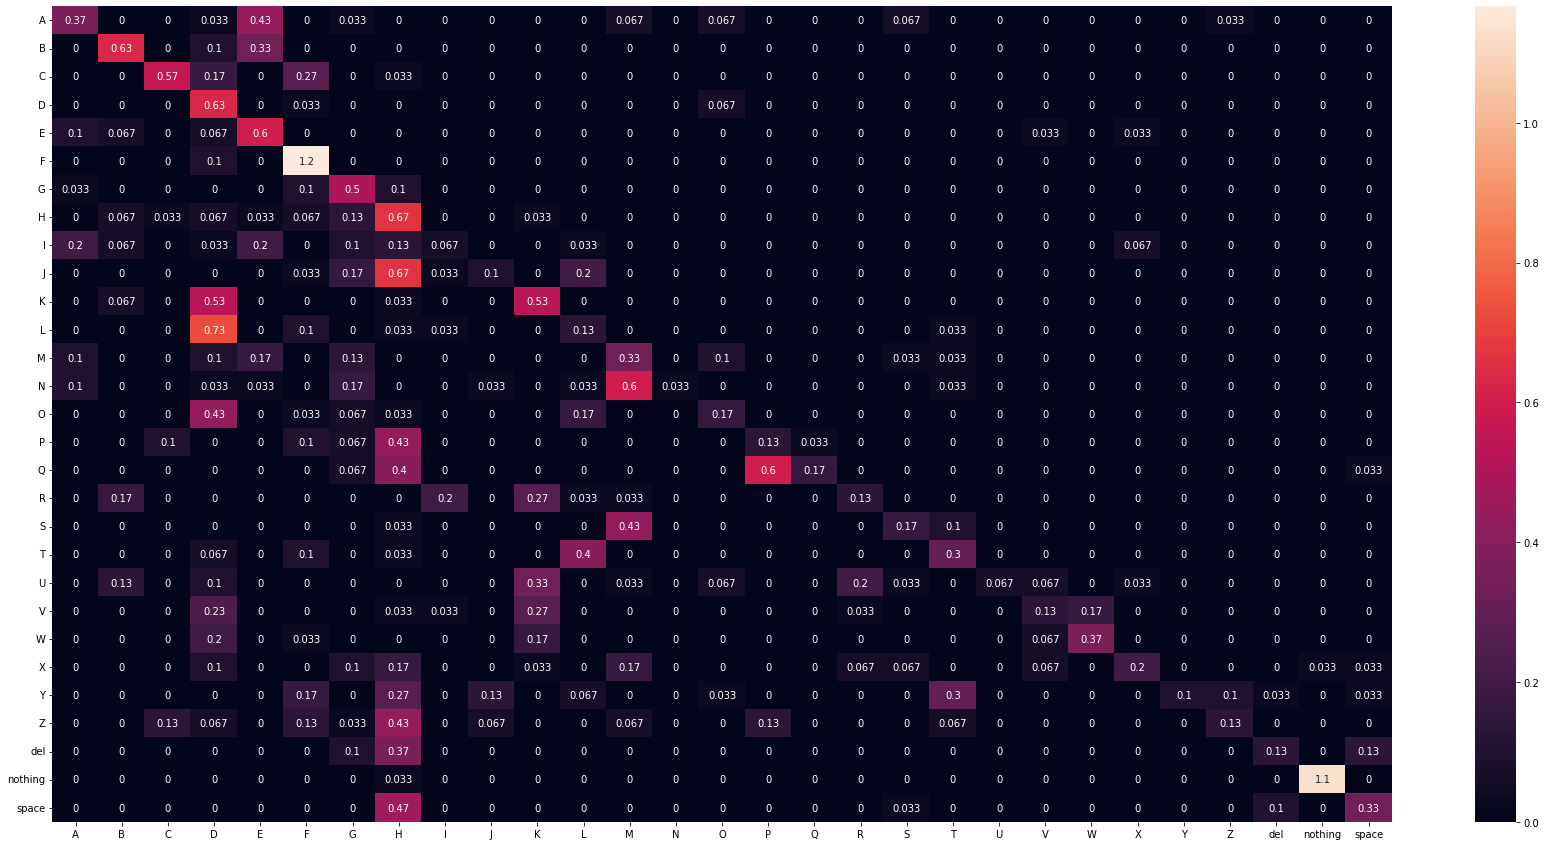

In [183]:
def make_confusion_matrix(y_pred,y_true):
    classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']
    n_classes = len(classes)
    # Build confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) * n_classes, index = [i for i in classes],
                     columns = [i for i in classes])
    plt.figure(figsize = (30,15))
    sns.heatmap(df_cm, annot=True)


make_confusion_matrix(y_pred, y_true)

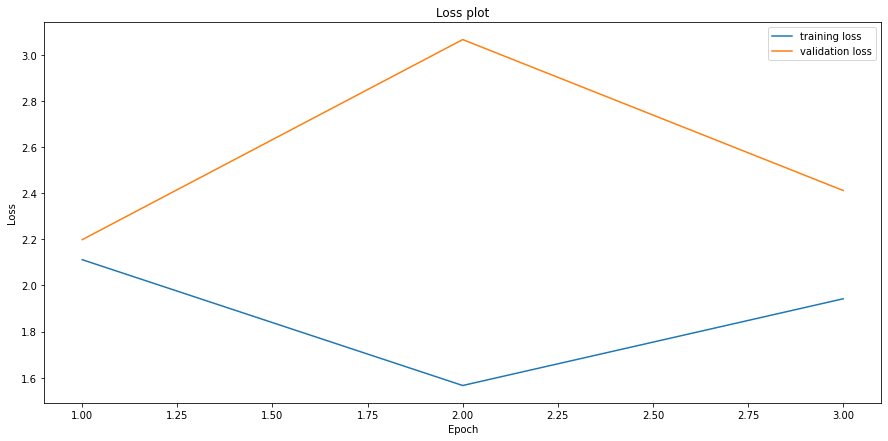

In [184]:
epochs = [i+1 for i in range(num_epochs)]
plt.figure(figsize=(15,7))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

plt.plot(epochs, mnet_training_loss, label = 'training loss')
plt.plot(epochs,mnet_val_loss, label = 'validation loss')
plt.legend()

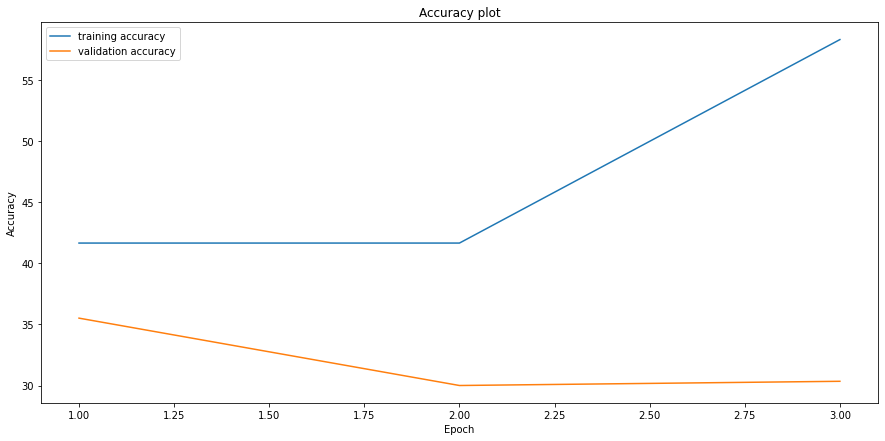

In [185]:
epochs = [i+1 for i in range(num_epochs)]
plt.figure(figsize=(15,7))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

plt.plot(epochs, mnet_training_accuracies, label = 'training accuracy')
plt.plot(epochs,mnet_val_accuracies, label = 'validation accuracy')
plt.legend()

In [186]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1_sco = f1_score(y_true, y_pred, average="macro")
print("F1_score is:", f1_sco)

precision_sco = precision_score(y_true, y_pred, average="macro")
print("precision_score is:", precision_sco)

recall_sco = recall_score(y_true, y_pred, average="macro")
print("recall_score is:", recall_sco)

F1_score is: 0.3185772570407865
precision_score is: 0.47570135508584044
recall_score is: 0.34658569687476076


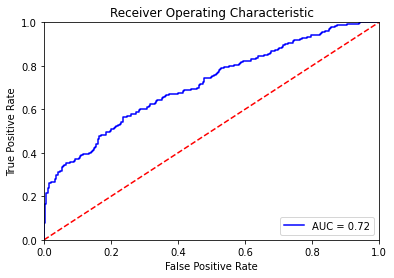

In [187]:
# ROC Score and curve

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import PrecisionRecallDisplay

binarize_true_results = []
for i in range(len(y_pred)):
  if y_pred[i]==y_true[i]:
    binarize_true_results.append(1)
  else:
    binarize_true_results.append(0)

fpr, tpr, threshold = roc_curve(binarize_true_results, y_score)
# print(fpr, tpr, threshold)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [78]:
# flop counts, number of parameters, Computational complexity (GMACs) where GFLOPs = 2 * GMACs

from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  net = mobilenet
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

MobileNetV2(
  3.5 M, 100.000% Params, 320.24 MMac, 100.000% MACs, 
  (features): Sequential(
    2.22 M, 63.451% Params, 318.96 MMac, 99.600% MACs, 
    (0): Conv2dNormActivation(
      928, 0.026% Params, 12.04 MMac, 3.760% MACs, 
      (0): Conv2d(864, 0.025% Params, 10.84 MMac, 3.384% MACs, 3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, 0.002% Params, 802.82 KMac, 0.251% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(0, 0.000% Params, 401.41 KMac, 0.125% MACs, inplace=True)
    )
    (1): InvertedResidual(
      896, 0.026% Params, 11.64 MMac, 3.635% MACs, 
      (conv): Sequential(
        896, 0.026% Params, 11.64 MMac, 3.635% MACs, 
        (0): Conv2dNormActivation(
          352, 0.010% Params, 4.82 MMac, 1.504% MACs, 
          (0): Conv2d(288, 0.008% Params, 3.61 MMac, 1.128% MACs, 32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): Batch

In [ ]:
# 
torch.save(mobilenet, 'mobilenet.pt')

np.savez('mnet_training_loss.npz', mnet_training_loss)
np.savez('mnet_training_accuracies.npz', mnet_training_accuracies)
np.savez('mnet_val_loss.npz', mnet_val_loss)
np.savez('mnet_val_accuracies.npz', mnet_val_accuracies)

In [ ]:
# Loading np pickled array

mnet_training_accuracies = np.load('mnet_training_accuracies.npz')['arr_0']
vggnet_training_accuracies = np.load('vggnet_training_accuracies.npz')['arr_0']
resnet_training_accuracies = np.load('resnet_training_accuracies .npz')['arr_0']

resnet_training_loss = np.load('resnet_training_loss.npz')['arr_0']
vggnet_training_loss = np.load('vggnet_training_loss.npz')['arr_0']
mnet_training_loss = np.load('mnet_training_loss.npz')['arr_0']